In [1]:
import warnings; 
warnings.simplefilter('ignore')

### 0. Install and Import Dependencies

In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from prophet import Prophet

### 1. Read in Data and Process Dates

In [4]:
df = pd.read_csv('dataset.csv')
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [5]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [6]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [7]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


### 2. Train Model

In [8]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q266m8d/tw4m9ggc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q266m8d/zl4maxhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6433', 'data', 'file=/tmp/tmp2q266m8d/tw4m9ggc.json', 'init=/tmp/tmp2q266m8d/zl4maxhy.json', 'output', 'file=/tmp/tmp2q266m8d/prophet_model_ywmv8jd/prophet_model-20221128130508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 3. Forecast Away

In [9]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.070476,812.555347,4040.711723,3041.070476,3041.070476,-642.519352,-642.519352,-642.519352,466.57542,...,16.623819,16.623819,16.623819,-1125.718591,-1125.718591,-1125.718591,0.0,0.0,0.0,2398.551124
1,2018-01-02,3041.848842,781.336629,4097.215792,3041.848842,3041.848842,-652.648904,-652.648904,-652.648904,466.57542,...,-11.281075,-11.281075,-11.281075,-1107.943248,-1107.943248,-1107.943248,0.0,0.0,0.0,2389.199937
2,2018-01-03,3042.627207,768.611969,4077.260907,3042.627207,3042.627207,-626.822675,-626.822675,-626.822675,466.57542,...,-4.411502,-4.411502,-4.411502,-1088.986593,-1088.986593,-1088.986593,0.0,0.0,0.0,2415.804532
3,2018-01-04,3043.405573,785.932222,4132.188896,3043.405573,3043.405573,-579.864732,-579.864732,-579.864732,466.57542,...,22.484584,22.484584,22.484584,-1068.924735,-1068.924735,-1068.924735,0.0,0.0,0.0,2463.540841
4,2018-01-05,3044.183939,809.153201,3961.359573,3044.183939,3044.183939,-615.887354,-615.887354,-615.887354,466.57542,...,-34.576305,-34.576305,-34.576305,-1047.886469,-1047.886469,-1047.886469,0.0,0.0,0.0,2428.296585


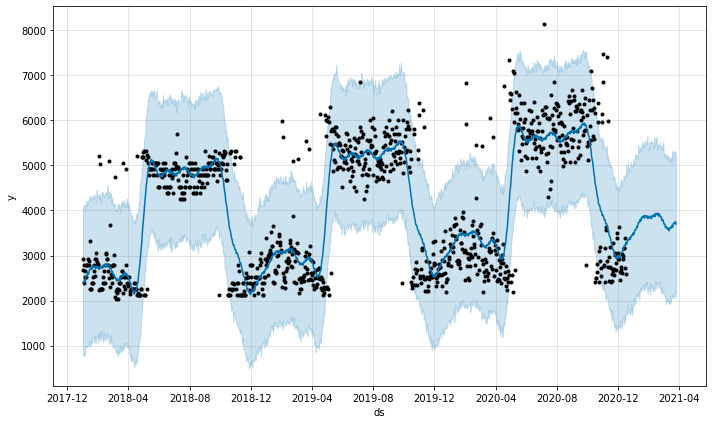

In [10]:
plot1 = m.plot(forecast)

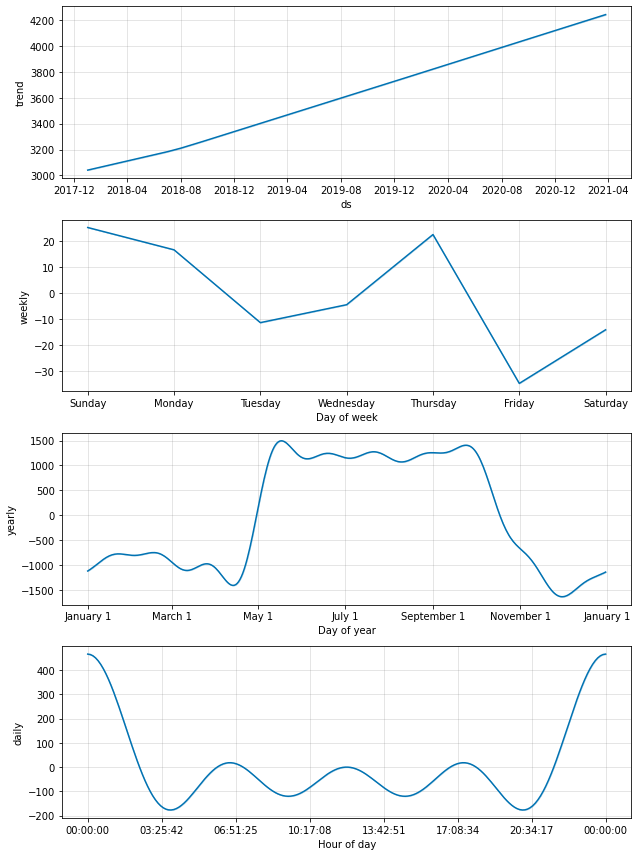

In [11]:
plt2 = m.plot_components(forecast)